# What is a time series?
A time series is any quantifiable metric or event that takes place over a period of time.

Examples:
- average heart rate per hour over a month
- daily closing value of a stock over a year
- number vehicle accidents in a certain city per week over a year. 

Recording this information over any **uniform period of time** is considered as a time series.

There is a frequency (daily, weekly, hourly etc) of the event and a length of time (a month, year, day etc) over which the event takes place. For a time series, the metric is recorded with a uniform frequency throughout the length of time over which we are observing the metric. In other words, the time in between each record should be the same.

## Tesla Stock Prices
from https://github.com/plotly/datasets/blob/master/tesla-stock-price.csv

In [2]:
import csv
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with open('../inputs/tesla-stock-price.csv', "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    for row in csv_reader:
        print(row)
        break

['date', 'close', 'volume', 'open', 'high', 'low']


In [4]:
data = pd.read_csv('../inputs/tesla-stock-price.csv')
df = pd.DataFrame(data, columns = ['date', 'close', 'volume', 'open', 'high', 'low'])
df.head()

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700


In [5]:
####### delete rows with empty values ######## 
df = df.dropna()
df.head()

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700


In [6]:
# conditionally delete rows where date is in other format
print(len(df))
to_be_dropped = []
for index in df.index:
    data = str(df.loc[index]['date'])
    #print(index, data)
    if data.find("/") == -1:
        to_be_dropped.append(index)
print(to_be_dropped)
df = df.drop(index=to_be_dropped)
print(len(df))

757
[0]
756


In [7]:
df.head()

,date,close,volume,open,high,low
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700
5,2018/10/09,262.80,12037780.0000,255.25,266.77,253.3000


In [8]:
df['date'] = pd.to_datetime(df['date'], dayfirst=False, yearfirst=True)
df.head()

,date,close,volume,open,high,low
1,2018-10-15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018-10-12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018-10-11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018-10-10,256.88,12781560.0000,264.61,265.51,247.7700
5,2018-10-09,262.80,12037780.0000,255.25,266.77,253.3000


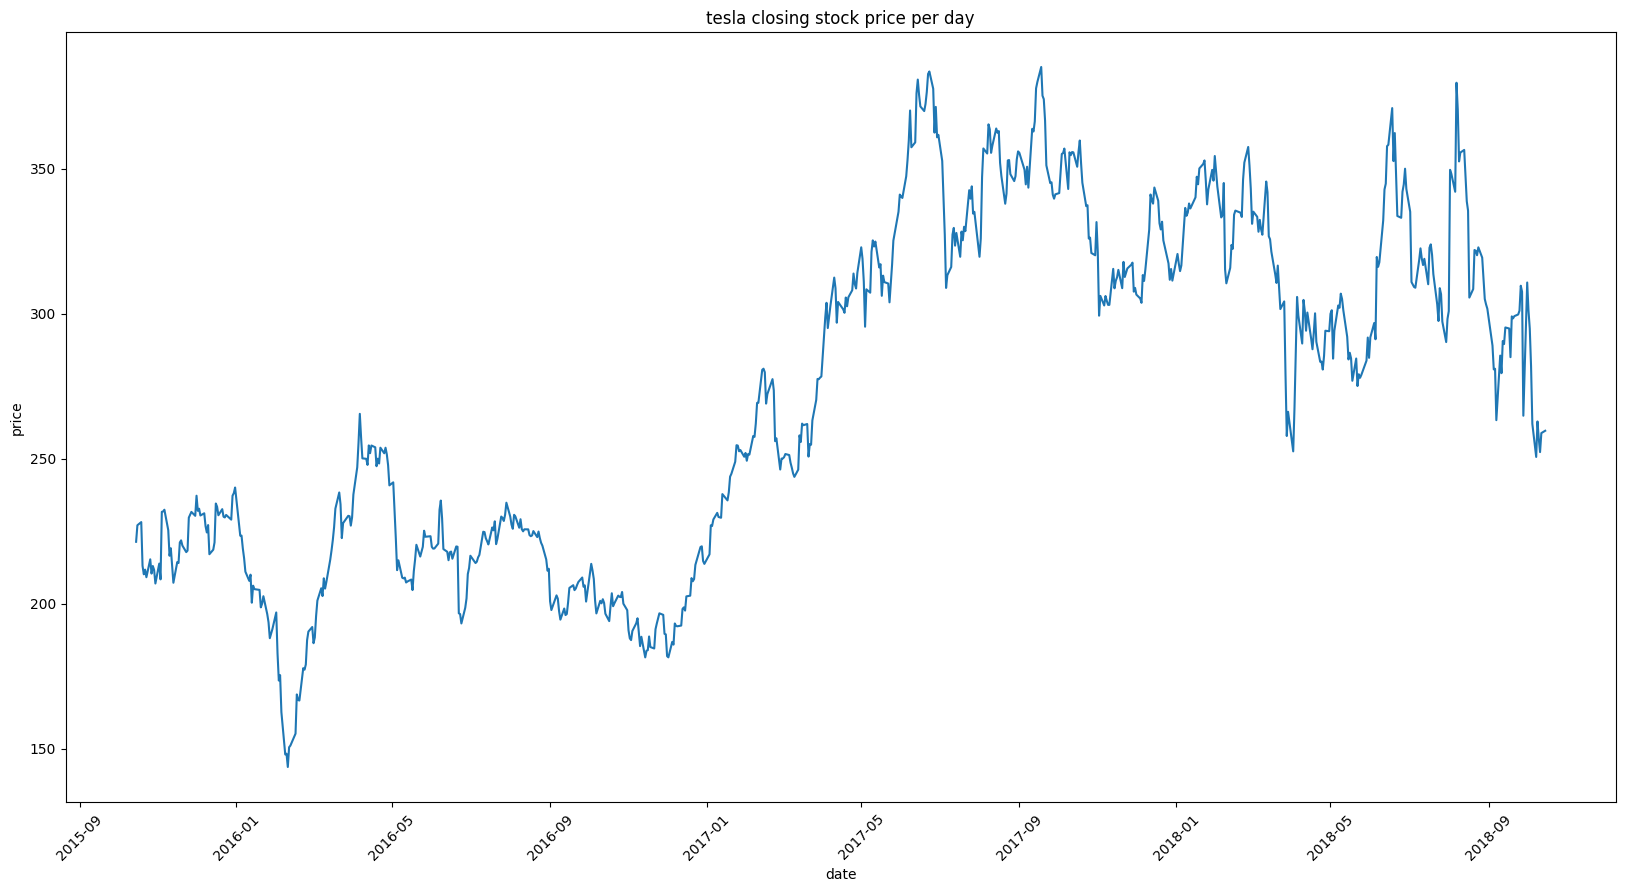

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
x = df['date'].values
y = df['close'].values
ax.plot(x,y)
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('price')
plt.title('tesla closing stock price per day')

# Display the plot
plt.show()

In [10]:
# reshape the data from (n,) to (n,1) and extract as numpy arrays
x1 = df['date'].values.reshape(-1, 1)
y1 = df['close'].values.reshape(-1, 1)

In [11]:
print(type(x1))
print(type(y1))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
